In [1]:
from limepy import limepy,sample
import numpy as np
import jax
import matplotlib.pyplot as plt

from limepydf_interpolate_jax import limepy_interpolate
a = limepy_interpolate()
my_df_func_jax = jax.jit(a.my_df_func)


#below is simply the test case for compiling!!!!
W0test, gtest, rhtest, Mtest = 4.0,2.0,3.0,1e5
k = limepy(W0test, gtest, M=Mtest, rh=rhtest)
ic = sample(k, N=1000)
W0_t = np.array([W0test])
g_t = np.array([gtest])
log10M_t = np.log10(np.array([Mtest]))
rh_t = np.array([rhtest])
xhhh = np.array([W0_t,g_t,log10M_t,rh_t])

rtest = np.sort(ic.r)[:500]
vtest = np.ones(500)

df_true = k.df(rtest,vtest)
df_test = my_df_func_jax(rtest,vtest,xhhh)

In [2]:
def test_dist(W0test, gtest, rhtest, Mtest,whether_r_v='r',fix_value=0,n=300):
    k = limepy(W0test, gtest, M=Mtest, rh=rhtest)
    ic = sample(k, N=1000)

    W0_t = np.array([W0test])
    g_t = np.array([gtest])
    log10M_t = np.log10(np.array([Mtest]))
    log10rh_t = np.log10(np.array([rhtest]))
    xhhh = np.array([W0_t,g_t,log10M_t,log10rh_t])

    if whether_r_v=='r':
        rtest = k.r[:n]
        vtest = np.ones(len(rtest))*fix_value
    elif whether_r_v=='v':
        vtest = np.sort(ic.v)[:n]
        rtest = np.ones(len(vtest))*fix_value
        

    df_true = k.df(rtest,vtest)
    df_test = my_df_func_jax(rtest,vtest,xhhh)

    plt.tight_layout(pad=10)
    fig, ax_lst = plt.subplots(2,2, figsize = (10,5), gridspec_kw={'height_ratios': [3,2]}) 

    fig.subplots_adjust(wspace=0.4)
    plt.subplots_adjust(hspace=.0)
    plt.setp(ax_lst[0][1].get_xticklabels(), visible=False)
    plt.setp(ax_lst[0][0].get_xticklabels(), visible=False)
    
    ax_lst[0][0].set_ylabel('DF', size=15) 
    ax_lst[1][0].set_ylabel('relative error', size=14) 

    ax_lst[0][1].set_ylabel('log DF', size=15) 
    ax_lst[1][1].set_ylabel('relative error', size=14)

    if whether_r_v=='r':
        ax_lst[1][1].set_xlabel(r'$r\;({\rm pc})$', size=15)  
        ax_lst[1][0].set_xlabel(r'$r\;({\rm pc})$', size=15)  
        xplot = rtest
    elif whether_r_v=='v':
        ax_lst[1][1].set_xlabel(r'$v\;({\rm km/s})$', size=15)  
        ax_lst[1][0].set_xlabel(r'$v\;({\rm km/s})$', size=15)
        xplot = vtest

    ax = ax_lst[0][0]
    ax.plot(xplot,df_true,c='red',label='Limepy Code')
    ax.plot(xplot,df_test,c='blue',label='Emulator')

    ax = ax_lst[1][0]
    ax.plot(xplot,(df_test-df_true)/(df_true),c='green')

    ax = ax_lst[0][1]
    ax.plot(xplot,np.log(df_true),c='red',label='Limepy Code')
    ax.plot(xplot,np.log(df_test),c='blue',label='Emulator')

    ax = ax_lst[1][1]
    ax.plot(xplot,(np.log(df_test)-np.log(df_true))/(np.log(df_true)),c='green')

    ax_lst[0][0].legend(fontsize=14)
    return fig,ax_lst

<Figure size 432x288 with 0 Axes>

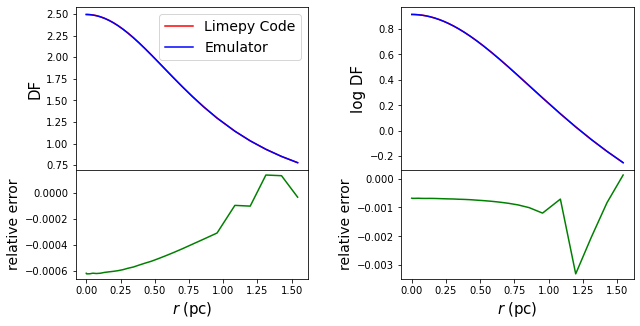

In [7]:
#show four results to show the accuracy of the plots!!!
#we plot two to plots to show accuracy!
W0test, gtest, rhtest, Mtest, whether_r_v, fix_value, n = 1.5, 0.002, 1 ,1e4, 'r', 0, 30
fig, ax_lst = test_dist(W0test, gtest, rhtest, Mtest,whether_r_v, fix_value,n)

In [8]:
fig.savefig('../plot/interpolate_lowgPhi.pdf')

<Figure size 432x288 with 0 Axes>

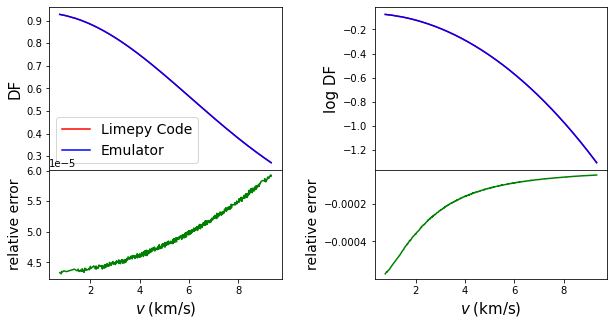

In [3]:
#show four results to show the accuracy of the plots!!!
#we plot two to plots to show accuracy!
W0test, gtest, rhtest, Mtest, whether_r_v, fix_value, n = 5.0, 2.0, 3.0, 1e5, 'v', 0, 800
fig, ax_lst = test_dist(W0test, gtest, rhtest, Mtest,whether_r_v, fix_value,n)

In [4]:
fig.savefig('../plot/interpolate_midgPhi.pdf')

<Figure size 432x288 with 0 Axes>

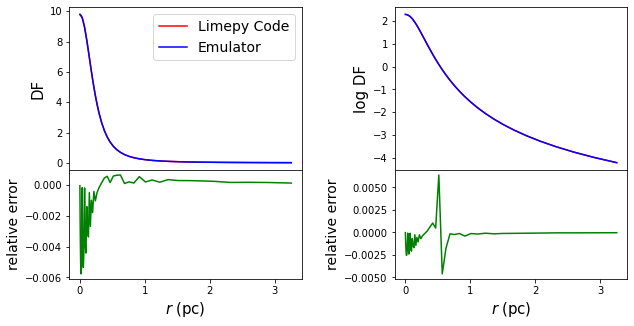

In [5]:
#This is intetesting to know!!!
#There is indeed some large difference for the errors due to the increase of w0 and g!
#Our interpolator is indeed not sufficient accurate!!!
#note that if you increase to 13, then things start to become weird here....
#our interpolation scheme is still not good enough!

W0test, gtest, rhtest, Mtest, whether_r_v, fix_value, n = 10, 1.0 , 9 ,1e6, 'r', 1, 50
fig, ax_lst = test_dist(W0test, gtest, rhtest, Mtest,whether_r_v, fix_value,n)

In [6]:
fig.savefig('../plot/interpolate_midghighPhi.pdf')

<Figure size 432x288 with 0 Axes>

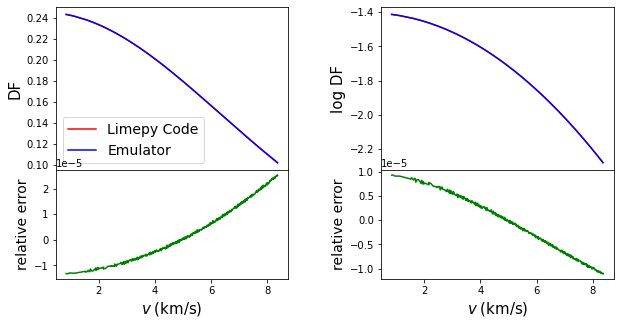

In [3]:
W0test, gtest, rhtest, Mtest, whether_r_v, fix_value, n = 7.5, 0.5 , 12 ,5e5, 'v', 1, 600
fig, ax_lst = test_dist(W0test, gtest, rhtest, Mtest,whether_r_v, fix_value,n)

In [4]:
fig.savefig('../plot/interpolate_lowgmidPhi.pdf')

<Figure size 432x288 with 0 Axes>

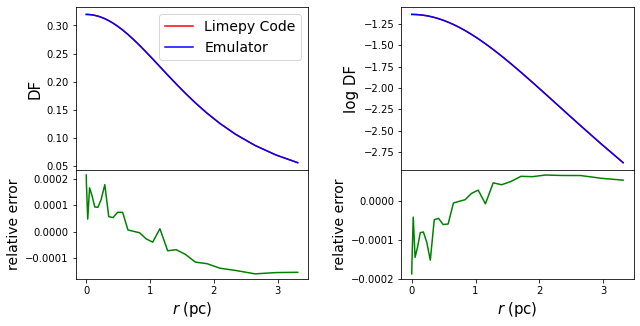

: 

In [5]:
W0test, gtest, rhtest, Mtest, whether_r_v, fix_value, n = 7.5, 0.5 , 12 ,5e5, 'r', 0, 30
fig, ax_lst = test_dist(W0test, gtest, rhtest, Mtest,whether_r_v, fix_value,n)

Text(0, 0.5, 'relative error')

<Figure size 432x288 with 0 Axes>

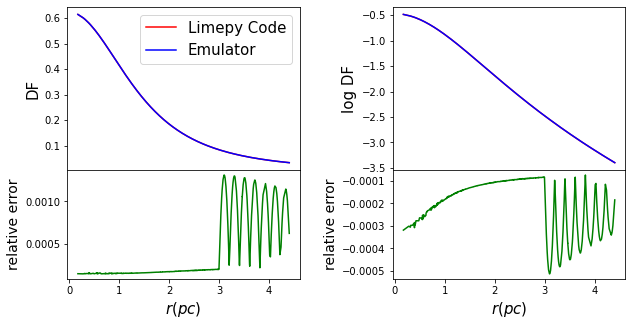

In [25]:
#This was changed from the original error production functions!
from limepy import sample, limepy
W0test, gtest, rhtest, Mtest = 4.0,2.0,3.0,1e5
k = limepy(W0test, gtest, M=Mtest, rh=rhtest)
ic = sample(k, N=1000)

W0_t = np.array([W0test])
g_t = np.array([gtest])
log10M_t = np.log10(np.array([Mtest]))
rh_t = np.log10(np.array([rhtest]))
xhhh = np.array([W0_t,g_t,log10M_t,rh_t])

rtest = np.sort(ic.r)[:700]
vtest = np.zeros(700)

df_true = k.df(rtest,vtest)
df_test = my_df_func_jax(rtest,vtest,xhhh)

#fig, ax_lst = plt.subplots(2,1,figsize=(5,8))
#fig,ax_lst = plt.subplots(nrows=2, sharex=True,figsize=(5,8))
plt.tight_layout(pad=10)
fig, ax_lst = plt.subplots(2,2, figsize = (10,5), gridspec_kw={'height_ratios': [3,2]}) 

fig.subplots_adjust(wspace=0.4)

ax = ax_lst[0][0]
ax.plot(rtest,df_true,c='red',label='Limepy Code')
ax.plot(rtest,df_test,c='blue',label='Emulator')

ax = ax_lst[1][0]
ax.plot(rtest,(df_test-df_true)/(df_true),c='green')

plt.subplots_adjust(hspace=.0)
plt.setp(ax_lst[0][0].get_xticklabels(), visible=False)


ax = ax_lst[0][1]
ax.plot(rtest,np.log(df_true),c='red',label='Limepy Code')
ax.plot(rtest,np.log(df_test),c='blue',label='Emulator')

ax = ax_lst[1][1]
ax.plot(rtest,(np.log(df_test)-np.log(df_true))/(np.log(df_true)),c='green')

plt.subplots_adjust(hspace=.0)
plt.setp(ax_lst[0][1].get_xticklabels(), visible=False)

ax_lst[1][0].set_xlabel('$r (pc)$', size=15)  
ax_lst[0][0].set_ylabel('DF', size=15) 
ax_lst[1][0].set_ylabel('relative error', size=14) 
ax_lst[0][0].legend(fontsize=15)

ax_lst[1][1].set_xlabel('$r (pc)$', size=15)  
ax_lst[0][1].set_ylabel('log DF', size=15) 
ax_lst[1][1].set_ylabel('relative error', size=14) 
#ax_lst[0][1].legend(fontsize=15)

#plt.savefig('/home/robin/Downloads/interpolate.pdf')

#ax = ax_lst[2]
#ax.plot(rtest,df_true,c='red')
#ax.plot(rtest,df_test,c='blue')
#ax.set_yscale('log')